# Processing MOC maps

Multi-Order Coverage maps represent regions in a spheric surface defined by tree-like structures with the aim of producing maps through different spatial resolutions. In astronomy they are used to procude lightweight version of surveys' coverage.

MOCs build the maps through Healpix. Healpix/MOC maps split the sky surface in diamond-like figures covering the same area each. Initially, at level zero, the number of diamonds is 12, covering the sphere in diamonds sized `~58 degree`. At each following level, the diamonds are sub-divide in 4, recursively. Until the maximum number of levels is reached, each level doubles the map resolution, splitting the sphere firstly in 48 diamond, at the second level in 192; third, 768 and so on. The maximum level -- or *order* -- is `29`, covering the sphere with `393.2 microarcsecond` size diamonds.

In [1]:
# Let's handle units
from astropy import units as u

# Structure to map healpix' levels to their angular sizes
#
healpix_levels = {
    0  : 58.63 * u.deg,
    1  : 29.32 * u.deg, 
    2  : 14.66 * u.deg, 
    3  : 7.329 * u.deg, 
    4  : 3.665 * u.deg, 
    5  : 1.832 * u.deg, 
    6  : 54.97 * u.arcmin, 
    7  : 27.48 * u.arcmin, 
    8  : 13.74 * u.arcmin, 
    9  : 6.871 * u.arcmin, 
    10 : 3.435 * u.arcmin, 
    11 : 1.718 * u.arcmin, 
    12 : 51.53 * u.arcsec, 
    13 : 25.77 * u.arcsec, 
    14 : 12.88 * u.arcsec, 
    15 : 6.442 * u.arcsec,
    16 : 3.221 * u.arcsec,
    17 : 1.61 * u.arcsec,
    18 : 805.2 * u.milliarcsecond,
    19 : 402.6 * u.milliarcsecond,
    20 : 201.3 * u.milliarcsecond,
    21 : 100.6 * u.milliarcsecond,
    22 : 50.32 * u.milliarcsecond,
    23 : 25.16 * u.milliarcsecond,
    24 : 12.58 * u.milliarcsecond,
    25 : 6.291 * u.milliarcsecond,
    26 : 3.145 * u.milliarcsecond,
    27 : 1.573 * u.milliarcsecond,
    28 : 786.3 * u.microarcsecond,
    29 : 393.2 * u.microarcsecond
}

The libraries we can use to generate/manipulate Healpix/MOC maps are:
* [healpy](http://healpy.readthedocs.io/en/latest/)
* [mocpy](https://github.com/tboch/mocpy)
* [healpix_util](https://github.com/esheldon/healpix_util)

In [2]:
# as usual, matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Load Healpix
import healpy

# Erin Sheldon's healpix_util
import healpix_util as hu

# Thomas Boch's MOCpy
import mocpy

/home/chbrandt/.conda/envs/booq-dev/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
%ls

chandra_MOC.fits
chandra_MOC_radec.fits
chandra_MOC_uniq.fits
Chandra_multiwavelength.fits
Chandra_multiwavelength_MOC_position.fit
Chandra_multiwavelength_MOC_uniq.fit
hpix_test.fits
moc_notes.ipynb
photometry@
xmm_MOC_radec.fits
xmm_MOC_uniq.fits
XMM_multiwavelength_cat.fits
XMM_multiwavelength_cat_MOC_position.fit
XMM_multiwavelength_cat_MOC_uniq.fit


In [4]:
from astropy.io import fits
chandra = fits.open('Chandra_multiwavelength.fits')[1]

In [5]:
print chandra.columns

ColDefs(
    name = 'MSID'; format = '12A'
    name = 'OBSID'; format = '5A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'RADEC_ERR'; format = 'E'
    name = 'DIST_NN'; format = 'E'
    name = 'SOFT_FLUX'; format = 'E'
    name = 'SOFT_FLUX_ERROR_HIGH'; format = 'E'
    name = 'SOFT_FLUX_ERROR_LOW'; format = 'E'
    name = 'HARD_FLUX'; format = 'E'
    name = 'HARD_FLUX_ERROR_HIGH'; format = 'E'
    name = 'HARD_FLUX_ERROR_LOW'; format = 'E'
    name = 'FULL_FLUX'; format = 'E'
    name = 'FULL_FLUX_ERROR_HIGH'; format = 'E'
    name = 'FULL_FLUX_ERROR_LOW'; format = 'E'
    name = 'LUM_SOFT'; format = 'D'
    name = 'LUM_HARD'; format = 'D'
    name = 'LUM_FULL'; format = 'D'
    name = 'IN_XMM'; format = '3A'
    name = 'REMOVED_LOGN_LOGS'; format = '3A'
    name = 'SDSS_REJ'; format = '3A'
    name = 'SDSS_OBJID'; format = '22A'
    name = 'SDSS_RA'; format = 'D'
    name = 'SDSS_DEC'; format = 'D'
    name = 'SDSS_REL'; format = 'E'
    name = 'SDSS_DIST

In [6]:
# we are interested here on columns 'RA','DEC' and 'RADEC_ERR'
_data = {'ra' : chandra.data['RA'] * u.degree,
         'dec': chandra.data['DEC']* u.degree,
         'pos_err' : chandra.data['RADEC_ERR']* u.arcsec}


In [7]:
from astropy.table import Table
_table = Table(_data)

In [8]:
import pandas as pd
df = _table.to_pandas()
del _table,_data

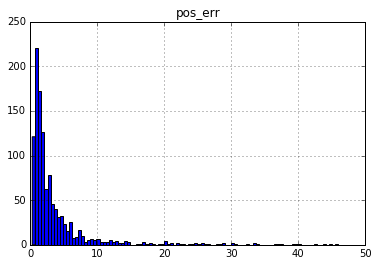

In [9]:
df.hist('pos_err',bins=100)
plt.show()

In [10]:
df.describe()

,pos_err,dec,ra
count,1146.000000,1146.000000,1146.000000
mean,3.843827,0.000751,140.746472
std,5.928429,0.661640,153.277263
min,0.286456,-1.456419,0.508337
25%,1.060410,-0.438103,19.782000
50%,1.820468,0.190696,40.538004
75%,3.849702,0.443856,334.452789
max,45.977352,1.485215,359.706421


In [11]:
# A function to find out which healpix level corresponds a given (typical) size of coverage
def size2level(size):
    """
    Returns nearest Healpix level corresponding to a given diamond size
    
    The 'nearest' Healpix level is here to be the nearest greater level, 
    right before the first level smaller than 'size'.
    """
    assert size.unit
    ko = None
    for k,v in healpix_levels.iteritems():
        if v < 2 * size:
            break
        ko = k
    return ko


In [12]:
level = size2level(df.pos_err.median()* u.arcsec)
nside = 2**level

In [13]:
print "Typical (median) position error: \n{}".format(df.pos_err.median())
print "\nCorrespondig healpix level: {} \n\t and nsize value: {}".format(level,nside)

Typical (median) position error: 
1.82046747208

Correspondig healpix level: 15 
	 and nsize value: 32768


In [14]:
# Let's convert from ra,dec to theta,phi
# This function comes from mocpy
def ra2phi(ra):
    """
    convert equatorial ra, dec in degrees
    to polar theta, phi in radians
    """
    import math
    return math.radians(ra)

def dec2theta(dec):
    """
    convert equatorial ra, dec in degrees
    to polar theta, phi in radians
    """
    import math
    return math.pi/2 - math.radians(dec)

def radec2thetaphi(ra,dec):
    _phi = ra2phi(ra)
    _theta = dec2theta(dec)
    return _theta,_phi

In [15]:
import healpy
def healpix_radec2pix(nside, ra, dec, nest=True):
    _theta,_phi = radec2thetaphi(ra, dec)
    return healpy.ang2pix(nside, _theta, _phi, nest=nest)

In [16]:
df['phi'] = df.ra.apply(ra2phi)
df['theta'] = df.dec.apply(dec2theta)

In [17]:
df.describe()

,pos_err,dec,ra,phi,theta
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,3.843827,0.000751,140.746472,2.456489,1.570783
std,5.928429,0.661640,153.277263,2.675193,0.011548
min,0.286456,-1.456419,0.508337,0.008872,1.544874
25%,1.060410,-0.438103,19.782000,0.345261,1.563050
50%,1.820468,0.190696,40.538004,0.707522,1.567468
75%,3.849702,0.443856,334.452789,5.837302,1.578443
max,45.977352,1.485215,359.706421,6.278061,1.596216


In [18]:
hp_pix_eq = df.apply(lambda x:healpix_radec2pix(nside,x.ra,x.dec,nest=True), axis=1)
hp_pix_ang = df.apply(lambda x:healpy.ang2pix(nside,x.theta,x.phi,nest=True), axis=1)
import numpy
numpy.array_equal(hp_pix_ang,hp_pix_eq)

True

### Let's do the same with healpix_util now

In [19]:
hpix = hu.HealPix(scheme='nest',nside=nside)
hpix

scheme:       2
scheme_name:  NEST
nside:        32768
npix:         12884901888
ncap:         2147418112
area:         9.75279e-10 square degrees
area:         3.511e-06 square arcmin
area:         0.0126396 square arcsec

In [20]:
hu_pix = hpix.eq2pix(ra=df.ra,dec=df.dec)
numpy.array_equal(hu_pix,hp_pix_ang) and numpy.array_equal(hu_pix,hp_pix_eq)

True

In [21]:
# Curiosity: which one is faster?
%timeit hpix.eq2pix(ra=df.ra,dec=df.dec)
%timeit df.apply(lambda x:healpix_radec2pix(nside,x.ra,x.dec,nest=True), axis=1)

10000 loops, best of 3: 136 µs per loop
10 loops, best of 3: 103 ms per loop


In [22]:
# So...all results are equal \o/ and ES's is faster
# we can now go on and put it inside our DataFrame
df['hpix'] = hu_pix

In [23]:
df.describe()

,pos_err,dec,ra,phi,theta,hpix
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1.146000e+03
mean,3.843827,0.000751,140.746472,2.456489,1.570783,5.060538e+09
std,5.928429,0.661640,153.277263,2.675193,0.011548,1.065304e+09
min,0.286456,-1.456419,0.508337,0.008872,1.544874,4.563039e+09
25%,1.060410,-0.438103,19.782000,0.345261,1.563050,4.658948e+09
50%,1.820468,0.190696,40.538004,0.707522,1.567468,4.741912e+09
75%,3.849702,0.443856,334.452789,5.837302,1.578443,4.928342e+09
max,45.977352,1.485215,359.706421,6.278061,1.596216,9.663631e+09


### MOCpy for visualizing and writing the maps

In [24]:
moc = mocpy.MOC()
moc.add_pix_list(level,df.hpix)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


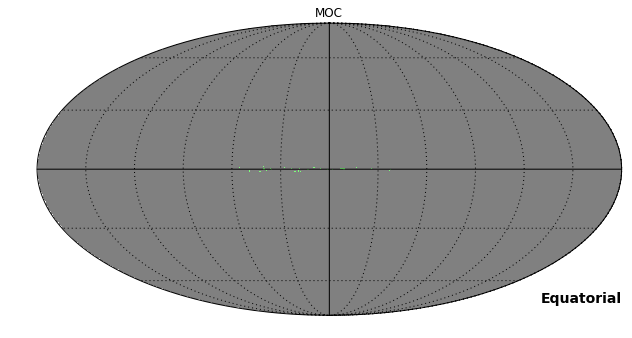

In [25]:
moc.plot()

In [26]:
moc.write('chandra_MOC_uniq.fits')

In [27]:
table = Table.from_pandas(df)
table.write('chandra_MOC_radec.fits',format='fits',overwrite=True)

In [28]:
del df,table,moc,chandra,hpix
%ls -lh

total 2,4M
-rw-r--r-- 1 chbrandt chbrandt  17K mag 11 14:06 chandra_MOC.fits
-rw-r--r-- 1 chbrandt chbrandt  57K mag 13 16:09 chandra_MOC_radec.fits
-rw-r--r-- 1 chbrandt chbrandt  17K mag 13 16:09 chandra_MOC_uniq.fits
-rw-r--r-- 1 chbrandt chbrandt 642K mag 11 00:13 Chandra_multiwavelength.fits
-rw-r--r-- 1 chbrandt chbrandt  40K mag 12 10:47 Chandra_multiwavelength_MOC_position.fit
-rw-r--r-- 1 chbrandt chbrandt  17K mag 12 10:19 Chandra_multiwavelength_MOC_uniq.fit
-rw-r--r-- 1 chbrandt chbrandt  17K mag 11 12:43 hpix_test.fits
-rw-r--r-- 1 chbrandt chbrandt 193K mag 13 16:08 moc_notes.ipynb
lrwxrwxrwx 1 chbrandt chbrandt   42 mag 11 18:02 photometry -> /home/chbrandt/Desktop/Catalogs/photometry/
-rw-r--r-- 1 chbrandt chbrandt  71K mag 12 10:47 xmm_MOC_radec.fits
-rw-r--r-- 1 chbrandt chbrandt  26K mag 12 10:47 xmm_MOC_uniq.fits
-rw-r----- 1 chbrandt chbrandt 1,3M mag 11 00:13 XMM_multiwavelength_cat.fits
-rw-r--r-- 1 chbrandt chbrandt  71K mag 12 10:47 XMM_multiwavelength_cat_MOC_

## MOC catalogs now for LaMassa's XMM

In [29]:
from astropy.io import fits
xmm = fits.open('XMM_multiwavelength_cat.fits')[1]
xmm.columns.names

['Rec_no',
 'OBSID',
 'RA',
 'DEC',
 'RADEC_ERR',
 'DIST_NN',
 'SOFT_FLUX',
 'SOFT_FLUX_ERR',
 'HARD_FLUX',
 'HARD_FLUX_ERR',
 'FULL_FLUX',
 'FULL_FLUX_ERR',
 'LUM_SOFT',
 'LUM_HARD',
 'LUM_FULL',
 'IN_CHANDRA',
 'REMOVED_LOGN_LOGS',
 'SDSS_REJ',
 'SDSS_OBJID',
 'SDSS_RA',
 'SDSS_DEC',
 'SDSS_REL',
 'SDSS_DIST',
 'U_MAG',
 'U_ERR',
 'G_MAG',
 'G_ERR',
 'R_MAG',
 'R_ERR',
 'I_MAG',
 'I_ERR',
 'Z_MAG',
 'Z_ERR',
 'SPECOBJID',
 'CLASS',
 'REDSHIFT',
 'Z_SRC',
 'WISE_NAME',
 'WISE_RA',
 'WISE_DEC',
 'WISE_SIGRA',
 'WISE_SIGDEC',
 'WISE_REL',
 'WISE_DIST',
 'W1',
 'W1SIG',
 'W1SNR',
 'W2',
 'W2SIG',
 'W2SNR',
 'W3',
 'W3SIG',
 'W3SNR',
 'W4',
 'W4SIG',
 'W4SNR',
 'WISE_EXT',
 'WISE_REJ',
 'UKIDSS_ID',
 'UKIDSS_RA',
 'UKIDSS_DEC',
 'UKIDSS_REL',
 'UKIDSS_DIST',
 'YMAG',
 'YSIG',
 'HMAG',
 'HSIG',
 'JMAG',
 'JSIG',
 'KMAG',
 'KSIG',
 'UKIDSS_REJ',
 'GALEX_OBJID',
 'GALEX_RA',
 'GALEX_DEC',
 'NUV_POSERR',
 'FUV_POSERR',
 'GALEX_REL',
 'GALEX_DIST',
 'NUV_MAG',
 'NUV_MAGERR',
 'FUV_MAG',
 'FUV_

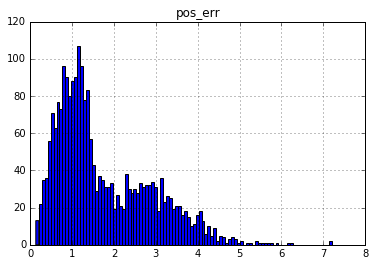

,pos_err,dec,ra
count,2358.000000,2358.000000,2358.000000
mean,1.741642,0.025526,192.093970
std,1.133119,0.585738,156.350579
min,0.130762,-1.460235,0.979577
25%,0.877820,-0.337498,40.480099
50%,1.340686,0.061293,322.273299
75%,2.556118,0.445204,335.082306
max,7.202450,1.184374,359.805770


In [30]:
# we are interested here on columns 'RA','DEC' and 'RADEC_ERR'
_data = {'ra' : xmm.data['RA'] * u.degree,
         'dec': xmm.data['DEC']* u.degree,
         'pos_err' : xmm.data['RADEC_ERR']* u.arcsec}
df = Table(_data).to_pandas()
df.hist('pos_err',bins=100)
plt.show()
df.describe()

In [31]:
level = size2level(df.pos_err.median()* u.arcsec)
nside = 2**level
print "Typical (median) position error: \n{}".format(df.pos_err.median())
print "\nCorrespondig healpix level: {} \n\t and nsize value: {}".format(level,nside)

Typical (median) position error: 
1.34068584442

Correspondig healpix level: 16 
	 and nsize value: 65536


In [32]:
hpix = hu.HealPix(scheme='nest',nside=nside)
hpix

scheme:       2
scheme_name:  NEST
nside:        65536
npix:         51539607552
ncap:         8589803520
area:         2.4382e-10 square degrees
area:         8.77751e-07 square arcmin
area:         0.0031599 square arcsec

In [33]:
df['hpix'] = hpix.eq2pix(ra=df.ra,dec=df.dec)
df.describe()

,pos_err,dec,ra,hpix
count,2358.000000,2358.000000,2358.000000,2.358000e+03
mean,1.741642,0.025526,192.093970,2.073992e+10
std,1.133119,0.585738,156.350579,3.535239e+09
min,0.130762,-1.460235,0.979577,1.825333e+10
25%,0.877820,-0.337498,40.480099,1.897169e+10
50%,1.340686,0.061293,322.273299,1.970228e+10
75%,2.556118,0.445204,335.082306,1.997022e+10
max,7.202450,1.184374,359.805770,3.865245e+10


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


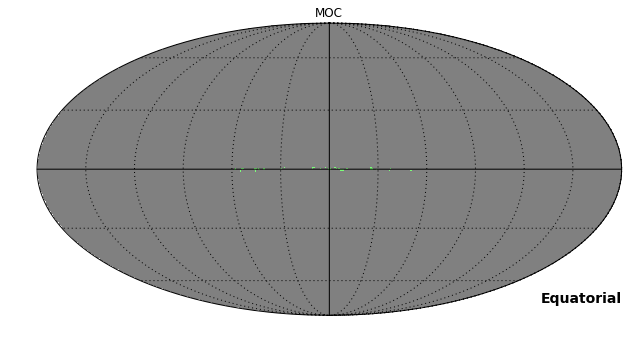

In [34]:
moc = mocpy.MOC()
moc.add_pix_list(level,df.hpix)
moc.plot()

In [35]:
moc.write('xmm_MOC_uniq.fits')
table = Table.from_pandas(df)
table.write('xmm_MOC_radec.fits',format='fits',overwrite=True)

In [36]:
%ls -lh

total 2,4M
-rw-r--r-- 1 chbrandt chbrandt  17K mag 11 14:06 chandra_MOC.fits
-rw-r--r-- 1 chbrandt chbrandt  57K mag 13 16:09 chandra_MOC_radec.fits
-rw-r--r-- 1 chbrandt chbrandt  17K mag 13 16:09 chandra_MOC_uniq.fits
-rw-r--r-- 1 chbrandt chbrandt 642K mag 11 00:13 Chandra_multiwavelength.fits
-rw-r--r-- 1 chbrandt chbrandt  40K mag 12 10:47 Chandra_multiwavelength_MOC_position.fit
-rw-r--r-- 1 chbrandt chbrandt  17K mag 12 10:19 Chandra_multiwavelength_MOC_uniq.fit
-rw-r--r-- 1 chbrandt chbrandt  17K mag 11 12:43 hpix_test.fits
-rw-r--r-- 1 chbrandt chbrandt 193K mag 13 16:08 moc_notes.ipynb
lrwxrwxrwx 1 chbrandt chbrandt   42 mag 11 18:02 photometry -> /home/chbrandt/Desktop/Catalogs/photometry/
-rw-r--r-- 1 chbrandt chbrandt  71K mag 13 16:09 xmm_MOC_radec.fits
-rw-r--r-- 1 chbrandt chbrandt  26K mag 13 16:09 xmm_MOC_uniq.fits
-rw-r----- 1 chbrandt chbrandt 1,3M mag 11 00:13 XMM_multiwavelength_cat.fits
-rw-r--r-- 1 chbrandt chbrandt  71K mag 12 10:47 XMM_multiwavelength_cat_MOC_

## Automating MOC generation from fits files

We need, to generate a coverage map, the following parameters:
* R.A. vector
* Dec. vector
* size of the elements

```
Object::
    given params:
        _ra     -> <vector>
        _dec    -> <vector>
        _radius -> <vector>
    computed params:
        _healpix-level
        _healpix-nside
    output:
        _moc-uniq <- <filename>
        _moc-obj  <- <filename>
```

In [37]:
def radec_2_moc(filename,ra_column,dec_column,radius_column=None,radius_value=None):
    import healpix_util
    import mocpy
    
    import time
    start_all = time.clock()
    
    tbhdu = open_fits(filename)
    table = radec_table(tbhdu,ra_column,dec_column,radius_column)
    
    start_convert = time.clock()
    
    if not radius_column:
        if radius_value != None and radius_value > 0:
            radius = radius_value
        else:
            from astropy import units
            radius = 1 * units.arcsec
    else:
        radius = radius_mean(tbhdu,radius_column)
    assert hasattr(radius,'unit')
    level = size2level(radius)
    nside = 2**level
    hpix = healpix_util.HealPix('nest',nside)
    table['hpix'] = hpix.eq2pix(table['ra'],table['dec'])

    stop_convert = time.clock()
    
    fileroot = '.'.join(filename.split('.')[:-1])

    start_write_normal = time.clock()

    fileout = '_'.join([fileroot,'MOC_position.fit'])
    table.write(fileout,format='fits',overwrite=True)

    stop_write_normal = time.clock()

    start_write_moc = time.clock()

#     fileout = '_'.join([fileroot,'MOC_uniq.fit'])
#     moc = mocpy.MOC()
#     moc.add_pix_list(level,table['hpix'])
#     moc.write(fileout)

    stop_write_moc = time.clock()

    stop_all = time.clock()
    
    _msg = "Time elapsed converting pixels: {}\n".format(stop_convert-start_convert)
    _msg += "Time elapsed on writing the table: {}\n".format(stop_write_normal-start_write_normal)
    _msg += "Time elapsed on writing MOC: {}\n".format(stop_write_moc-start_write_moc)
    _msg += "Total time: {}\n".format(stop_all-start_all)
    _msg += "Number of points: {}\n".format(len(table))
    return _msg
    
def open_fits(filename,hdu=1):
    from astropy.io import fits
    from astropy.units import Quantity

    _tab = fits.open(filename,ignore_missing_end=True)[hdu]
    return _tab

def radec_table(tbhdu,ra_column,dec_column,radius_column=None):
    from astropy.table import Table
    from astropy import units
    import numpy
    _data = {'ra':tbhdu.data.field(ra_column) * units.deg,
             'dec':tbhdu.data.field(dec_column) * units.deg,
             'id':numpy.arange(tbhdu.header['NAXIS2'])}
    if radius_column:
        try:
            _d = tbhdu.data.field(radius_column)
            _data.update({'radius':_d})
        except:
            pass
    return Table(_data)

def radius_mean(tbhdu,radius_column):
    from astropy.units import Quantity
    radius = None
    if radius_column:
        _radius = Quantity(tbhdu.data.field(radius_column), u.arcsec)
        radius = _radius.mean()
    assert radius
    return radius


In [38]:
res = radec_2_moc('Chandra_multiwavelength.fits','RA','DEC','RADEC_ERR')
print res

Time elapsed converting pixels: 0.003245
Time elapsed on writing the table: 0.015697
Time elapsed on writing MOC: 9.99999997475e-07
Total time: 0.116892
Number of points: 1146



In [39]:
res = radec_2_moc('XMM_multiwavelength_cat.fits','RA','DEC','RADEC_ERR')
print res

Time elapsed converting pixels: 0.002763
Time elapsed on writing the table: 0.015296
Time elapsed on writing MOC: 0.0
Total time: 0.10334
Number of points: 2358



In [40]:
%ls -lh

total 2,5M
-rw-r--r-- 1 chbrandt chbrandt  17K mag 11 14:06 chandra_MOC.fits
-rw-r--r-- 1 chbrandt chbrandt  57K mag 13 16:09 chandra_MOC_radec.fits
-rw-r--r-- 1 chbrandt chbrandt  17K mag 13 16:09 chandra_MOC_uniq.fits
-rw-r--r-- 1 chbrandt chbrandt 642K mag 11 00:13 Chandra_multiwavelength.fits
-rw-r--r-- 1 chbrandt chbrandt  48K mag 13 16:09 Chandra_multiwavelength_MOC_position.fit
-rw-r--r-- 1 chbrandt chbrandt  17K mag 12 10:19 Chandra_multiwavelength_MOC_uniq.fit
-rw-r--r-- 1 chbrandt chbrandt  17K mag 11 12:43 hpix_test.fits
-rw-r--r-- 1 chbrandt chbrandt 193K mag 13 16:08 moc_notes.ipynb
lrwxrwxrwx 1 chbrandt chbrandt   42 mag 11 18:02 photometry -> /home/chbrandt/Desktop/Catalogs/photometry/
-rw-r--r-- 1 chbrandt chbrandt  71K mag 13 16:09 xmm_MOC_radec.fits
-rw-r--r-- 1 chbrandt chbrandt  26K mag 13 16:09 xmm_MOC_uniq.fits
-rw-r----- 1 chbrandt chbrandt 1,3M mag 11 00:13 XMM_multiwavelength_cat.fits
-rw-r--r-- 1 chbrandt chbrandt  90K mag 13 16:09 XMM_multiwavelength_cat_MOC_

In [41]:
def print_fits_columns(fitsfile,hdu=1):
    from astropy.io import fits
    hdul = fits.open(fitsfile,ignore_missing_end=True)
    tbhdu = hdul[1]
    print "Number of objects: {}\n".format(tbhdu.header['NAXIS2'])
    print "{} columns:\n".format(fitsfile)
    ncols = len(tbhdu.columns)
    i = 0
    for c in tbhdu.columns:
        if i<=5:
            print "\t{}; ".format(c.name)
        else:
            print "\t... ({} columns)".format(ncols-i)
            break
        i += 1
    hdul.close()

In [42]:
print_fits_columns('photometry/hers/hers_catalogue_3sig250_no_extended.fits')

Number of objects: 32815

photometry/hers/hers_catalogue_3sig250_no_extended.fits columns:

	RA; 
	DEC; 
	F250; 
	E250; 
	ET250; 
	CHI250; 
	... (9 columns)


    Header size is not multiple of 2880: 1
There may be extra bytes after the last HDU or the file is corrupted. [astropy.io.fits.hdu.hdulist]


In [43]:
res = radec_2_moc('photometry/hers/hers_catalogue_3sig250_no_extended.fits','RA','DEC')
print res

Time elapsed converting pixels: 0.017864
Time elapsed on writing the table: 0.051547
Time elapsed on writing MOC: 1.00000000103e-06
Total time: 0.104844
Number of points: 32815



In [44]:
print_fits_columns('photometry/galex/S82_gmsc_chbrandt.fit')

Number of objects: 1204349

photometry/galex/S82_gmsc_chbrandt.fit columns:

	objid; 
	ra; 
	dec; 
	poserr; 
	name; 
	e_bv; 
	... (19 columns)


In [45]:
res = radec_2_moc('photometry/galex/S82_gmsc_chbrandt.fit','ra','dec','poserr')
print res

Time elapsed converting pixels: 0.125184
Time elapsed on writing the table: 0.242631
Time elapsed on writing MOC: 9.99999997475e-07
Total time: 0.80557
Number of points: 1204349



In [46]:
print_fits_columns('photometry/sdss/Stripe82_photo_chbrandt.fit')

Number of objects: 13802113

photometry/sdss/Stripe82_photo_chbrandt.fit columns:

	ObjID; 
	ra; 
	dec; 
	u; 
	g; 
	r; 
	... (21 columns)


In [47]:
res = radec_2_moc('photometry/sdss/Stripe82_photo_chbrandt.fit','ra','dec')
print res

Time elapsed converting pixels: 1.503912
Time elapsed on writing the table: 4.692636
Time elapsed on writing MOC: 9.99999997475e-07
Total time: 11.860383
Number of points: 13802113



In [48]:
print_fits_columns('photometry/shela/shela_stripe82_v1.3_cat.fits')

Number of objects: 1229647

photometry/shela/shela_stripe82_v1.3_cat.fits columns:

	SHELA_ID; 
	SDSS_ID; 
	SDSS_RA; 
	SDSS_DEC; 
	TYPE; 
	FLAGS; 
	... (10 columns)


In [49]:
res = radec_2_moc('photometry/shela/shela_stripe82_v1.3_cat.fits','SDSS_RA','SDSS_DEC')
print res

Time elapsed converting pixels: 0.173279
Time elapsed on writing the table: 0.173791
Time elapsed on writing MOC: 1.00000000458e-06
Total time: 0.752169
Number of points: 1229647



In [50]:
print_fits_columns('photometry/spies/SpIES_ch1ch2_allaor_5s_bothchan_final.fits')

Number of objects: 7757528

photometry/spies/SpIES_ch1ch2_allaor_5s_bothchan_final.fits columns:

	RA; 
	DEC; 
	FLUX_APER_1_ch1; 
	FLUX_APER_2_ch1; 
	FLUX_APER_3_ch1; 
	FLUX_APER_4_ch1; 
	... (23 columns)


In [51]:
res = radec_2_moc('photometry/spies/SpIES_ch1ch2_allaor_5s_bothchan_final.fits','RA','DEC')
print res

Time elapsed converting pixels: 0.835236
Time elapsed on writing the table: 1.837238
Time elapsed on writing MOC: 0.0
Total time: 5.689374
Number of points: 7757528



In [52]:
print_fits_columns('photometry/unwise/brandt.fits')

Number of objects: 9429798

photometry/unwise/brandt.fits columns:

	objid; 
	ra; 
	dec; 
	run; 
	camcol; 
	field; 
	... (45 columns)


In [53]:
res = radec_2_moc('photometry/unwise/brandt.fits','ra','dec')
print res

Time elapsed converting pixels: 1.034426
Time elapsed on writing the table: 2.465438
Time elapsed on writing MOC: 9.99999997475e-07
Total time: 15.298956
Number of points: 9429798



In [54]:
print_fits_columns('photometry/vla/first_14dec17.fits')

Number of objects: 946432

photometry/vla/first_14dec17.fits columns:

	RA; 
	DEC; 
	SIDEPROB; 
	FPEAK; 
	FINT; 
	RMS; 
	... (19 columns)


In [55]:
res = radec_2_moc('photometry/vla/first_14dec17.fits','RA','DEC')
print res

Time elapsed converting pixels: 0.104784
Time elapsed on writing the table: 0.123237
Time elapsed on writing MOC: 9.99999997475e-07
Total time: 0.518552
Number of points: 946432

